## 1. Extract from PDF

In [437]:
import fitz  # PyMuPDF

# Đọc file PDF
pdf_file = "Daivietsukytoanthu.pdf"
doc = fitz.open(pdf_file)


In [438]:
title = 'Đ ại  V i ệt  S ử K ý'

In [439]:
import re
from collections import defaultdict

def get_content(page):
    note =''
    content =''
    text = page.get_text("text")
    try:
        text = re.split(r"^\d+\s*\n.*\n", text, maxsplit=1, flags=re.MULTILINE)[1]
        text = text.split('\n                                                \n')
        if len(text)>1: note = text[1]
        content = text[0]
    except:
        return text, ''
    
    return content, note

In [440]:
def is_new(event):
    pattern = r'^(\[?[0-9]+[a-z]?\]?\s+)?[^\/\[\]]*(\/?[^\/\[\]]+\/?)?[^\[\]]*(\[[^\[\]]+\])?[^\[\]]*\[\s*[0-9]+\s*(TCN)?\s*\]'
    if re.match(pattern,event):
        return True
    return False

In [441]:
c1,c2 = get_content(doc[125])
c1

'Khổng Nguyên, Phạm Bảo, Kim Cát, Lý Khái, Đào Lão, Nguyễn Hoàn làm Viên ngoại lang thượng thư \nsảnh; Lương Cửu, Đào Sâm, Quách Thục, Nguyễn Nhân, Nguyễn Khánh, Đào Tương, Quách Cự Tầm, \nNguyễn Thối làm Trung thư hoả; Lý Ngũ, Kiểu Nghĩa, Lý Cá, Nguyễn Biếm, Nguyễn Bộc, Nguyễn Khoan, \nĐào Lục, Đỗ Ký, Kiểu Thiệu làm Chi hậu thư gia. \n  \nNgày Quý Sửu, xuống chiếu cho Gián nghị đại phu Mâu Du Đô chọn quân Long Dực cũ làm các \nquân tả hữu Ngọc Giai, Hưng Thánh, Quảng Thành, vũ [30a] Đô. \n  \nNgày Giáp Dần, hơn 2 vạn người Chân Lạp vào cướp bến Ba Đầu ở châu Nghệ An. Xuống chiếu \ncho Nhập nội thái phó Lý Công Bình đem các quan chức đô cùng người châu Nghệ An đi đánh. \n  \nTháng 2, ngày Ất Mão, xuống chiếu tha cho cá tội nhân ở phủ Đô hộ. Ngày Nhâm Tuất, xuống \nchiếu tha cho 130 người bị biếm truất. \n  \nNgày Quý Hợi, Lý Công Bình đánh bại người Chân Lạp ở bến Ba Đầu, bắt được chủ tướng và \nquân lính. \n  \nNgày Ất Sửu, các quan dâng tôn hiệu là Thuận Thiên Quảng Vận Khâm Minh Nhâ

In [442]:
events = []
page_number = []
event = ''
notes = []
n = 0
for i, page in enumerate(doc):  
    content, note = get_content(page)
    content_split = content.split('\n')
    
    notes.append(note)
    if i% 50 == 0:
        print(i)
    if content_split[0].find(title) == 0:
        content_split = content_split[2:]
        page_number.append(n)
        events.append(event)
        event = ''
        n = i
    for item in content_split:
        if item=='': continue
        if (is_new(item) and event.endswith('. ')) or item[:2]=='Kỷ':
            page_number.append(n)
            n = i
            events.append(event)
            event = item
        else:
            event = event + '\n' + item



0
50
100
150
200
250
300
350
400
450
500
550
600
650
700


In [740]:
events = events[1:]
page_number = page_number[1:]

In [741]:
len(events)

920

In [574]:
#copy = events
#copy.append('x')
copy = events.copy()

In [739]:
events = copy.copy()

In [492]:
def find_index(target):
    for i, event in enumerate(events):
        if event.find(target) > 0:
            return i, page_number[i] + 1

In [674]:
find_index('Chiêu Hoàng ')

(425, 156)

## 2. Preprocessing

In [702]:
def is_proper_name(text):
    
    # Kiểm tra xem text có kết thúc bằng " \n" không
    if not text.endswith(" "):
        return False
    
    # Loại bỏ " " ở cuối để đếm số từ
    content = text[:-1]
    
    # Tách các từ và đếm
    words = content.split(' ')
    
    if len(words) < 2: 
        return False
    if len(words) > 7: 
        return False
        
    for word in words:
        word = word.rstrip(',')
        if len(word) <1 : return False
        if word[0] != word[0].upper():
            return False
        if not all(c.isalpha() or c == ',' or c =='(' or c ==')' or c =='_' for c in word):
            return False
        
    return True
        

In [694]:
is_proper_name('Hùng Vương ')

True

In [743]:
len(events)

953

In [742]:
d = 0
for i, e in enumerate(events):
    for p in e.split('\n'):
        if is_proper_name(p):
            if e.find(p) > 100:
                split1 = e[:e.find(p)]
                split2 = e[e.find(p):]
                events = events[:i + d] + [split1,split2] + events[i + 1 + d:]
                d += 1
                print(p)
                print(e[:].find(p),  i)

Lạc Long Quân 
607 1
Hùng Vương 
2413 1
Văn Vương 
1644 43
Minh Vương 
397 48
Ai Vương 
560 53
Thuật Dương Vương 
4186 54
Dương Tam Kha 
751 171
PHẾ ĐẾ 
3833 194
TRUNG TÔNG HOÀNG ĐẾ 
1456 208
NGỌA TRIỀU HOÀNG ĐẾ 
3491 208
THÁI TÔNG HOÀNG ĐẾ 
14351 231
NHÂN TÔNG HOÀNG ĐẾ 
1561 275
THẦN TÔNG HOÀNG ĐẾ 
6364 329
Cao Tông Hoàng Đế 
2509 379
Huệ Tông Hoàng Đế 
2235 412
NHÂN TÔNG HOÀNG ĐẾ 
9679 473
MINH TÔNG HOÀNG ĐẾ 
1530 504
NGHệ TÔNG HOÀNG ĐẾ 
5910 555
Duệ TÔNG HOÀNG ĐẾ 
1688 558
THUẬN TÔNG HOÀNG ĐẾ 
6856 574
THIẾU ĐẾ 
2354 583
TRÙNG QUANG ĐẾ 
5203 597
K_ THUỘC MINH 
5745 599
Túc Tông Khâm Hoàng Đế 
2425 697
Chiêu Tông Thần Hoàng Đế 
13589 708
Cung Hoàng Đế 
11273 716
Mạc Đăng Doanh 
1177 723
Trung Tông Hoàng Đế 
456 743
Anh Tông Tuấn Hoàng Đế 
820 751
Thần Tông Uyên Hoàng Đế (Thượng) 
1175 817
Chân Tông Thuận Hoàng Đế 
1373 839
Thần Tông Uyên Hoàng Đế (Hạ) 
385 845
Văn Tổ Nghị Vương 
581 895


In [752]:
z =''
for e in events:
    if len(e) < 50:
        print(e)
        z = e


[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  

[1a]  


In [753]:
events = [e for e in events if e !=z]
for e in events:
    if len(e) < 50:
        print(e)

In [754]:
len(events)

931

In [755]:
data = {
    "events": [event for event in events],
}

In [756]:
dfx = pd.DataFrame(data)

In [758]:
dfx.to_csv('history_events_process.csv',sep="\t", index=False)

In [759]:
df = pd.read_csv("history_events_process.csv", delimiter="\t")  # Hoặc sep="\t"
df

,events
0,"\n[1a] Triều Liệt Đại Phu, Quốc Tử Giám Tư Ngh..."
1,Kỷ Hồng Bàng Thị \nKinh Dương Vương \n[1b] Tên...
2,Kỷ Hồng Bàng Thị \nKinh Dương Vương \n[1b] Tên...
3,Hùng Vương \n[3a] Con Lạc Long Quân (không rõ ...
4,"Kỷ Nhà Thục \nAn Dương Vương \nHọ Thục, tên hú..."
...,...
926,"Canh Thìn, [Dương Hoà] năm thứ 6 [1640], (Minh..."
927,"Nhâm Ngọ, [Dương Hoà] năm thứ 8 [1642], (Minh ..."
928,"Quý Mùi, [Dương Hoà] năm thứ 9 [1643], (từ thá..."
929,"[Ất Dậu, Thịnh Đức năm thứ 3 [1655], (Minh Lịc..."


In [761]:
len(events)

931

In [803]:
def clean_text(text):
    lines = text.split('\n')
    content = lines[0]
    for line in lines[1:]:
        if content[-2:] =='. ':
            content =content + '\n' +line
        else: 
            content += line
    return content


z = clean_text(events[3])

Hùng Vương 
g 
#####
Hùng Vương [3a] Con Lạc Long Quân (không rõ tên húy)5, đóng đô ở Phong Châu (nay là huyện Bạch Hạc)6. 
Hùng Vương lên ngôi, đặt quốc hiệu là Văn Lang (nước này đông giáp biển Nam Hải, tây đến Ba 
a 
#####
Hùng Vương [3a] Con Lạc Long Quân (không rõ tên húy)5, đóng đô ở Phong Châu (nay là huyện Bạch Hạc)6. 
Hùng Vương lên ngôi, đặt quốc hiệu là Văn Lang (nước này đông giáp biển Nam Hải, tây đến Ba Thục, bắc đến hồ Động Đình, nam giáp nước Hồ Tôn, tức nước Chiêm Thành, nay là Quảng Nam), chia 
a 
#####
Hùng Vương [3a] Con Lạc Long Quân (không rõ tên húy)5, đóng đô ở Phong Châu (nay là huyện Bạch Hạc)6. 
Hùng Vương lên ngôi, đặt quốc hiệu là Văn Lang (nước này đông giáp biển Nam Hải, tây đến Ba Thục, bắc đến hồ Động Đình, nam giáp nước Hồ Tôn, tức nước Chiêm Thành, nay là Quảng Nam), chia nước làm 15 bộ là: Giao Chỉ, Chu Diên, Vũ Ninh, Phúc Lộc, Việt Thường, Ninh Hải, Dương Tuyền, Lục 
c 
#####
Hùng Vương [3a] Con Lạc Long Quân (không rõ tên húy)5, đóng đô ở Phong Châ

## 3. Text analysis

In [888]:
data_df = pd.read_csv('process2.csv', delimiter="\t")
data_df

,events
0,"\n[1a] Triều Liệt Đại Phu, Quốc Tử Giám Tư Ngh..."
1,Kỷ Hồng Bàng\n Thị Kinh Dương Vương [1b] Tên h...
2,"Lạc Long Quân [2a]\n Tên húy là Sùng Lãm, con ..."
3,Sử thần Ngô Sĩ Liên nói: Khi trời đất mới mở m...
4,Hùng Vương [3a] \nCon Lạc Long Quân (không rõ ...
...,...
2209,"Mùa xuân, xuống chiếu đi kinh lược Thuận Hoá, ..."
2210,"Mùa đông, tháng 10, ngày 13 là ngày Quý Dậu, [..."
2211,"[Ất Dậu, Thịnh Đức năm thứ 3 [1655], (Minh Lịc..."
2212,"Bính Thân, [Thịnh Đức] năm thứ 4 [1656], (Minh..."


In [870]:
sample = data_df['events'].values[:100]
event = data_df['events'].values

### 3.1 Phân tích từ khóa

Phân tích từ khóa, xác định trong 1 sự kiện thường xuất hiện các từ khóa nào, để tạo tags cho sự kiện

In [922]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Danh sách từ dừng tiếng Việt (có thể mở rộng)
stopwords_vn = [
    "là", "của", "và", "với", "được", "cho", "có", "đến", "từ", "trong", "việc","bọn",
     "năm", "tháng", "ngày", "việc", "đã", "bị", "cũng", "khi", "mà", "thì","đều", "các", "thứ", "liên", "ngô", "sĩ",
    "hưu", "mùa", "biết", "như", "10", "11"
]

# Dữ liệu văn bản
data = event

# Khởi tạo TfidfVectorizer với bigram và loại bỏ từ dừng
vectorizer = TfidfVectorizer(
    stop_words=stopwords_vn,  # Loại bỏ từ dừng
    ngram_range=(2, 4),       # Trích xuất bigram (cụm từ 2 từ)
    max_features=1000           # Lấy 10 cụm phổ biến nhất
)

X = vectorizer.fit_transform(data)

# Lấy danh sách từ khóa (bigrams) và trọng số TF-IDF
feature_names = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Tạo DataFrame để hiển thị kết quả
df_freq = pd.DataFrame({'Từ khóa': feature_names, 'Trọng số TF-IDF': frequencies})
print(df_freq.sort_values(by='Trọng số TF-IDF', ascending=False)[:50])


           Từ khóa  Trọng số TF-IDF
882    xuống chiếu        52.417602
561      quận công        51.043781
879     xuân giêng        48.568760
702   thượng hoàng        42.805805
61     chiêm thành        41.361528
29         bấy giờ        40.276545
894       đem quân        37.060444
454       nhà minh        34.477430
903        đi đánh        34.280970
162     hoàng thái        30.951951
689        thái tử        30.849371
680       thái hậu        30.547939
168       hoàng đế        30.141339
480      niên hiệu        29.973415
708       thần nói        28.655274
630        sử thần        28.650671
631    sử thần nói        28.029889
459       nhà tống        26.134155
476      nhật thực        25.979482
442         ngự sử        25.874579
321       lên ngôi        24.987718
844        vua sai        24.530679
782         trở về        24.236051
95         con gái        24.129198
703     thượng thư        24.113508
665       thiên hạ        24.003052
396        nghệ an        23

### 3.2 Phân tích chủ đề

Phân tích chủ đề, xác định các chủ đề thường gặp, để tạo bộ phân loại chủ đề cho sự kiện

In [940]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo LDA
lda = LatentDirichletAllocation(n_components=20)  # Giả sử có 3 chủ đề
lda.fit(X)

# Hiển thị các từ khóa quan trọng cho mỗi chủ đề
for i, topic in enumerate(lda.components_):
    print(f"Chủ đề {i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Chủ đề 0:
['quan quân', 'đuổi theo', 'rất nhiều', 'an phủ', 'đánh giặc', 'quân minh', 'quân giặc', 'quân đánh', 'cửa biển', 'đem quân']
Chủ đề 1:
['tâu lên', 'quan viên', 'phủ huyện', 'chỉ rằng', 'đô đốc', 'ra sắc chỉ', 'ra sắc', 'người nào', 'nha môn', 'sắc chỉ']
Chủ đề 2:
['sai quan', 'minh vĩnh', 'an vương', 'bình an vương', 'bình an', 'thuận thiên', 'không rõ', 'rõ tên', 'không rõ tên', 'xuống chiếu']
Chủ đề 3:
['chính sự', 'an phủ sứ', 'an phủ', 'vua tống', 'chuyển vận', 'người họ', 'nội mật', 'mật viện', 'thánh nhân', 'nhữ hài']
Chủ đề 4:
['sứ sang nhà', 'sang cống', 'sang nhà', 'nước chiêm', 'thu vua', 'sai sứ sang', 'sứ sang', 'chiêm thành', 'nhà tống', 'sai sứ']
Chủ đề 5:
['xuống chiếu', 'ban tước', 'vương hầu', 'một lần', 'làm sử', 'định lệ', 'đại phu', 'công chúa', 'việt vương', 'anh vũ']
Chủ đề 6:
['đinh mùi', 'chẳng phải', 'chiêm thành', 'phía tây', 'hành cung', 'đông 12', 'động đất', 'nước to', 'tcn hán', 'nhật thực']
Chủ đề 7:
['làm hoàng', 'tên húy', 'hoàng thái hậu', '

### 3.3 Phân tích độ dài

Phân tích độ dài của mỗi sự kiện, để xác định được độ dài cho việc chunking

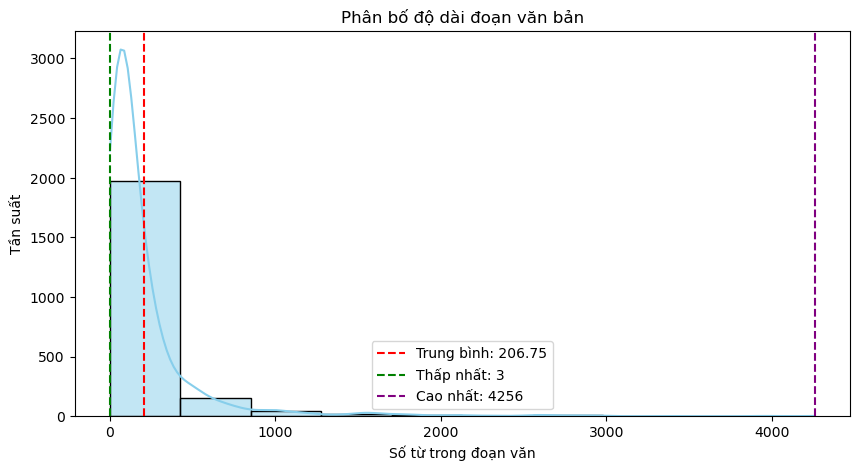

In [932]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tính độ dài của mỗi đoạn text (số từ)
lengths = [len(text.split()) for text in data]

# Tính trung bình, min, max
average_length = np.mean(lengths)
min_length = np.min(lengths)
max_length = np.max(lengths)

# ✅ Vẽ histogram phân bố độ dài đoạn văn bản
plt.figure(figsize=(10, 5))
sns.histplot(lengths, bins=10, kde=True, color='skyblue')
plt.axvline(average_length, color='red', linestyle='dashed', label=f'Trung bình: {average_length:.2f}')
plt.axvline(min_length, color='green', linestyle='dashed', label=f'Thấp nhất: {min_length}')
plt.axvline(max_length, color='purple', linestyle='dashed', label=f'Cao nhất: {max_length}')
plt.xlabel("Số từ trong đoạn văn")
plt.ylabel("Tần suất")
plt.title("Phân bố độ dài đoạn văn bản")
plt.legend()
plt.show()



In [939]:
np_len = np.array(lengths)
print((np_len < 200).sum())
print((np_len < 300).sum())
print((np_len < 400).sum())
print((np_len < 500).sum())


1614
1856
1949
2019


## 4. Create dataset and embeddings


### 4.1 Xác định thời gian sự kiện

In [891]:
import re

def extract_years(text):
    pattern = r'\[(-?\d{2,4})\s*TCN?\]|\[(-?\d{2,4})\]|/(-?\d{2,4})/'
    matches = re.findall(pattern, text)
    
    years = []
    for match in matches:
        if match[0]:  # Năm có "TCN", lưu với dấu âm
            years.append(f"-{match[0]}")
        elif match[1]:  # Năm bình thường trong []
            years.append(match[1])
        elif match[2]:  # Năm trong //
            years.append(match[2])
    if years: return years[0]
    else: return pd.NA

data_df['year'] = data_df['events'].apply(extract_years)

In [1072]:
extract_years('[2012 TCN]')

'-2012'

In [1170]:
data_df

,events,year
0,"\n[1a] Triều Liệt Đại Phu, Quốc Tử Giám Tư Ngh...",NaN
1,Kỷ Hồng Bàng\n Thị Kinh Dương Vương [1b] Tên h...,NaN
2,"Lạc Long Quân [2a]\n Tên húy là Sùng Lãm, con ...",NaN
3,Sử thần Ngô Sĩ Liên nói: Khi trời đất mới mở m...,NaN
4,Hùng Vương [3a] \nCon Lạc Long Quân (không rõ ...,NaN
...,...,...
2209,"Mùa xuân, xuống chiếu đi kinh lược Thuận Hoá, ...",<NA>
2210,"Mùa đông, tháng 10, ngày 13 là ngày Quý Dậu, [...",<NA>
2211,"[Ất Dậu, Thịnh Đức năm thứ 3 [1655], (Minh Lịc...",1655
2212,"Bính Thân, [Thịnh Đức] năm thứ 4 [1656], (Minh...",1656


In [1075]:
data_df['year'][:20]

0     <NA>
1     <NA>
2     <NA>
3     <NA>
4     <NA>
5     <NA>
6     <NA>
7     <NA>
8     <NA>
9     -258
10    <NA>
11    -257
12    <NA>
13    -255
14    <NA>
15    -249
16    -221
17    -214
18    -210
19    -208
Name: year, dtype: object

### 4.2 Phân loại sự kiện (topic)

In [991]:
from collections import defaultdict

def classify_event(text):
    """
    Phân loại sự kiện trong văn bản dựa trên các từ khóa.
    
    Args:
        text (str): Văn bản đầu vào.
    
    Returns:
        list: Danh sách các loại sự kiện tìm thấy trong văn bản.
    """
    categories = {
    "Ngoại giao": ["sai sứ", "sang cống", "đáp lễ", "sang phong", "sang chầu", "biếu nhà", "liên minh", "giao hảo", "nghị hòa", "hòa ước", "triều cống", "giao thương", "tiếp sứ", "hội kiến", "sứ thần", "kết thông gia"],
    "Chính trị": ["đổi niên hiệu", "hạ lệnh", "xuống chiếu", "sắc chỉ", "phong", "niên hiệu", "ra lệnh", "luật", "lên ngôi", "phong vua", "tấu lên", "sai quan", "bãi nhiệm", "cải cách", "sắc lệnh","phong tước","thái tử", "công chúa","hoàng hậu", "thái hậu"],
    "Văn hóa": ["thi hội", "đua thuyền", "chùa", "đạo", "đền", "miếu", "lễ", "học", "trụ trì", "diễn", "mở hội", "hát tuồng", "múa rối", "thư pháp", "văn bia"],
    "Giáo dục": [ "kinh sử","lấy đỗ", "lấy sinh", "học sinh", "người đỗ", "tuyển chọn nhân tài", "khoa cử", "mở trường", "dạy học", "tiến sĩ", "trạng nguyên", "bảng vàng","sách", "in sách", "dịch sách"],
    "Quân sự": ["đi đánh", "làm phản", "làm loạn", "đánh chiếm", "tướng quân", "đem quân", "giặc", "trận", "chiến thắng", "thua", "tấn công", "quân giặc", "quân đánh", "bắt sống", "chiếm đóng", "vây thành", "phục kích", "bố trận", "đạo quân", "đóng giữ"],
    "Thời tiết": ["hạn", "lụt", "bão", "động đất", "sao chổi", "sấm", "mưa", "dịch", "nhật thực", "nguyệt thực", "nước to", "mất mùa", "nắng gắt", "tuyết", "băng giá"],
    "Đối thoại": ["nói", "rằng", "làm thơ", "nghị luận", "tranh biện"],
    "Giới thiệu nhân vật": ["tên huý là", "ở ngôi", "cha là", "xuất thân", "tôn xưng", "danh hiệu"],
    "Kinh tế - Tài chính": ["bạc", "vàng", "tiền đồng", "phát hành", "thuế", "miễn thuế", "định giá", "giá cả", "buôn bán", "thương mại" ,],
    "Xã hội - Đời sống": ["cứu tế", "phát chẩn", "y tế", "bệnh dịch", "thuốc", "chữa bệnh", "cứu đói", "trợ cấp", "giảm tô", "giảm thuế","cày","ruộng đất", "kho lúa"],
    "Kiến trúc - Xây dựng": ["xây thành", "đắp đê", "làm cầu", "sửa chùa", "xây cung", "làm đường", "dựng bia", "khắc chữ","xây chùa"],
    "Khoa học - Kỹ thuật": ["sao trời", "thiên văn", "tính lịch", "đo đạc", "y thuật", "phát minh"]
}
    
    event_types = []
    text = text.lower()  
    
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in text:
                event_types.append(category)
                break  # Chỉ cần tìm thấy 1 từ khóa là đủ để phân loại vào nhóm đó

    return event_types

# 📌 Ví dụ sử dụng
text ='''
Giáp Ngọ, /Ứng Thiên/ năm thứ 1 /994/, (Tống Thuần Hoá năm thứ 5). Mùa xuân, tháng giêng, đổi niên hiệu. 
Phong hoàng tử thừ mười là Mang làm Nam Quốc Vương, đóng ở châu Vũ Lung3. 
Sai nha hiệu là Phí Sùng Đức sang nhà Tống [21a] sang thăm đáp lễ. 
Cháu vua nước Chiêm Thành là Chế Cai vào chầu. Trước đây, nước Chiêm Thành sai Chế Đông dâng sản vật địa phương, vua trách là trái lễ, không nhận. Vua nước đó sợ, mới sai Chế Cai vào chầu.

'''
print(classify_event(text))  # Output: ['chính trị', 'văn hóa']


['Ngoại giao', 'Chính trị', 'Văn hóa']


### 4.3 Xác định keywords (tags)

**Xác định tên riêng (Địa danh, nhân vật):**

In [999]:
import re

def extract_name(text):   
    regex = r'[A-ZÀÁẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬĐÈÉẺẼẸÊẾỀỂỄỆÌÍỈĨỊÒÓỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÙÚỦŨỤƯỨỪỬỮỰỲÝỶỸỴ][a-zàáảãạăắằẳẵặâấầẩẫậđèéẻẽẹêếềểễệìíỉĩịòóỏõọôốồổỗộơớờởỡợùúủũụưứừửữựỳýỷỹỵ]+(?:\s+[A-ZÀÁẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬĐÈÉẺẼẸÊẾỀỂỄỆÌÍỈĨỊÒÓỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÙÚỦŨỤƯỨỪỬỮỰỲÝỶỸỴ][a-zàáảãạăắằẳẵặâấầẩẫậđèéẻẽẹêếềểễệìíỉĩịòóỏõọôốồổỗộơớờởỡợùúủũụưứừửữựỳýỷỹỵ]+)+'
    
    name_raw = re.findall(regex, text)
    
    name_result = []
    for name in name_raw:
        # Loại bỏ dấu câu ở cuối nếu có
        name_final = re.sub(r'[\.,!?;:]$', '', name)
        name_result.append(name_final)
    
    return set(name_result)

In [1000]:
# Ví dụ
text = "Mùa xuân, tháng giêng, vua Nhà Lý sai sứ sang phong. Tháng hai, đánh giặc ở Ái Châu, chiến thắng vang dội."
result = extract_name(text)
print(result)

{'Ái Châu', 'Nhà Lý'}


**Triều đại:**

In [ ]:
trieudai_vn = [
    "Nhà Đinh", "nhà Đinh", "Vua Đinh", "vua Đinh", 
    "Nhà Tiền Lê", "nhà Tiền Lê", "Vua Lê", "vua Lê",  
    "Nhà Lê", "nhà Lê", 
    "Nhà Lý", "nhà Lý", "Vua Lý", "vua Lý",  
    "Nhà Trần", "nhà Trần", "Vua Trần", "vua Trần",  
    "Nhà Hồ", "nhà Hồ", "Vua Hồ", "vua Hồ",  
    "Nhà Hậu Lê", "nhà Hậu Lê",
    "Nhà Nguyễn", "nhà Nguyễn", "Vua Nguyễn", "vua Nguyễn"
]

# Triều đại Trung Quốc (có thể gọi bằng "Nhà", "quân", "giặc")
trieudai_tq = [
    "Nhà Tần", "nhà Tần", "quân Tần", "giặc Tần",  
    "Nhà Hán", "nhà Hán", "quân Hán", "giặc Hán",  
    "Nhà Đường", "nhà Đường", "quân Đường", "giặc Đường", 'vua Đường',  
    "Nhà Tống", "nhà Tống", "quân Tống", "giặc Tống", 'vua Tống',
    "Nhà Nguyên", "nhà Nguyên", "quân Nguyên", "giặc Nguyên",  'vua Nguyên', 
    "Nhà Minh", "nhà Minh", "quân Minh", "giặc Minh", 'vua Minh',
    "Nhà Thanh", "nhà Thanh", "quân Thanh", "giặc Thanh"
]

trieudai = set(trieudai_vn + trieudai_tq)

In [986]:
text = "Mùa xuân, tháng giêng, vua Nhà Lý sai sứ sang phong. Tháng hai, đánh giặc quân Nguyên ở Ái Châu, chiến thắng vang dội."

found_dynasties = {dyn for dyn in trieudai if dyn in text}
found_dynasties

{'Nhà Lý', 'quân Nguyên'}

**Sự kiện:**

In [987]:
keywords = set([
    "sai sứ", "sang cống", "đáp lễ", "sang phong", "sang chầu", "biếu nhà", "liên minh", "giao hảo", "nghị hòa", "hòa ước", "triều cống", "giao thương", "tiếp sứ", "hội kiến", "sứ thần", "kết thông gia",  # Ngoại giao
    "đổi niên hiệu", "hạ lệnh", "xuống chiếu", "sắc chỉ", "phong", "niên hiệu", "ra lệnh", "luật", "lên ngôi", "phong vua", "tấu lên", "sai quan", "bãi nhiệm", "cải cách", "sắc lệnh","phong tước","thái tử", "công chúa","hoàng hậu", "thái hậu",  # Chính trị
    "thi hội", "đua thuyền", "chùa", "đạo", "đền", "miếu", "lễ", "học", "trụ trì", "diễn", "mở hội", "hát tuồng", "múa rối", "thư pháp", "văn bia",  # Văn hóa
    "kinh sử","lấy đỗ", "lấy sinh", "học sinh", "người đỗ", "tuyển chọn nhân tài", "khoa cử", "mở trường", "dạy học", "tiến sĩ", "trạng nguyên", "bảng vàng","sách", "in sách", "dịch sách",  # Giáo dục
    "đi đánh", "làm phản", "làm loạn", "đánh chiếm", "tướng quân", "đem quân", "giặc", "trận", "chiến thắng", "thua", "tấn công", "quân giặc", "quân đánh", "bắt sống", "chiếm đóng", "vây thành", "phục kích", "bố trận", "đạo quân", "đóng giữ",  # Chiến tranh
    "hạn", "lụt", "bão", "động đất", "sao chổi", "sấm", "mưa", "dịch", "nhật thực", "nguyệt thực", "nước to", "mất mùa", "nắng gắt", "tuyết", "băng giá",  # Thời tiết
    "nói", "rằng", "làm thơ", "nghị luận", "tranh biện",  # Đối thoại
    "tên huý là", "ở ngôi", "cha là", "xuất thân", "tôn xưng", "danh hiệu",
    "bạc", "vàng", "tiền đồng", "phát hành", "thuế", "miễn thuế", "định giá", "giá cả", "buôn bán", "thương mại" ,
    "cứu tế", "phát chẩn", "y tế", "bệnh dịch", "thuốc", "chữa bệnh", "cứu đói", "trợ cấp", "giảm tô", "giảm thuế","cày","ruộng đất", "kho lúa",
    "xây thành", "đắp đê", "làm cầu", "sửa chùa", "xây cung", "làm đường", "dựng bia", "khắc chữ","xây chùa",
    "sao trời", "thiên văn", "tính lịch", "đo đạc", "y thuật", "phát minh"
])

In [990]:
text = "Mùa xuân, tháng giêng, vua Nhà Lý sai sứ sang phong. Tháng hai, đánh giặc quân Nguyên ở Ái Châu, chiến thắng vang dội."
text_lower = text.lower()
found_keywords = {kw for kw in keywords if kw in text_lower}
found_keywords

{'chiến thắng', 'giặc', 'phong', 'sai sứ', 'sang phong'}

**Tạo tags:**

In [1001]:
def extract_tags(text):
    text_lower = text.lower()
    named_entities = extract_name(text)
    found_dynasties = {dyn for dyn in trieudai if dyn in text}
    event_keywords = {kw for kw in keywords if kw in text_lower}
    
    return event_keywords | named_entities | found_dynasties
    

In [1100]:
text = "Mùa xuân, tháng giêng, vua Nhà Lý sai sứ sang phong. Tháng hai, đánh giặc quân Nguyên ở Ái Châu, chiến thắng vang dội."
print(classify_event(text))
extract_tags(text)

['Ngoại giao', 'Chính trị', 'Quân sự']


{'Nhà Lý',
 'chiến thắng',
 'giặc',
 'phong',
 'quân Nguyên',
 'sai sứ',
 'sang phong',
 'Ái Châu'}

### 4.4 Chunk

In [1057]:
import re
import nltk
from nltk.tokenize import sent_tokenize

# Tải resource cần thiết cho NLTK
def setup_nltk():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')

# Hàm tạo chunk thông minh dựa trên các câu hoàn chỉnh
def create_chunks(text, max_chunk_size=200, min_chunk_size=50):
    """
    Tạo các chunk thông minh dựa trên ranh giới câu và đoạn.
    
    Args:
        text (str): Văn bản đầu vào.
        max_chunk_size (int): Số từ tối đa trong một chunk.
        min_chunk_size (int): Số từ tối thiểu để tạo thành một chunk độc lập.
    
    Returns:
        list: Danh sách các chunk có nội dung ngữ nghĩa hợp lý.
    """
    setup_nltk()
    
    # Tách đoạn văn (paragraph)
    paragraphs = re.split(r'\n\s*\n', text)
    chunks = []
    current_chunk = []
    current_chunk_size = 0
    
    for paragraph in paragraphs:
        # Bỏ qua đoạn trống
        if not paragraph.strip():
            continue
            
        # Tách câu trong đoạn
        sentences = sent_tokenize(paragraph)
        
        paragraph_added = False
        
        for sentence in sentences:
            sentence_words = sentence.split()
            sentence_length = len(sentence_words)
            
            # Trường hợp 1: Câu quá dài, buộc phải tách ra thành chunk riêng
            if sentence_length > max_chunk_size:
                # Xử lý chunk hiện tại nếu có
                if current_chunk:
                    chunks.append(' '.join(current_chunk))
                    current_chunk = []
                    current_chunk_size = 0
                
                # Tách câu dài thành nhiều chunk
                for i in range(0, sentence_length, max_chunk_size):
                    if i + max_chunk_size >= sentence_length:
                        # Phần cuối của câu dài
                        if current_chunk_size == 0:
                            # Thêm trực tiếp vào chunks nếu chưa có gì trong current_chunk
                            chunks.append(' '.join(sentence_words[i:]))
                        else:
                            # Thêm vào chunk hiện tại
                            current_chunk.extend(sentence_words[i:])
                            current_chunk_size += len(sentence_words[i:])
                    else:
                        # Phần giữa của câu dài
                        chunks.append(' '.join(sentence_words[i:i+max_chunk_size]))
                        
            # Trường hợp 2: Câu vừa + chunk hiện tại sẽ vượt quá max_chunk_size
            elif current_chunk_size + sentence_length > max_chunk_size:
                # Hoàn thành chunk hiện tại
                chunks.append(' '.join(current_chunk))
                
                # Bắt đầu chunk mới với câu hiện tại
                current_chunk = sentence_words
                current_chunk_size = sentence_length
                paragraph_added = True
                
            # Trường hợp 3: Thêm câu vào chunk hiện tại
            else:
                current_chunk.extend(sentence_words)
                current_chunk_size += sentence_length
                paragraph_added = True
        
        # Kết thúc đoạn, thêm dấu xuống dòng nếu không phải là đoạn cuối
        if paragraph_added and current_chunk:
            current_chunk[-1] = current_chunk[-1] + '.'
            
    # Xử lý chunk cuối cùng nếu có
    if current_chunk:
        # Nếu chunk cuối quá nhỏ và có chunk trước đó, gộp với chunk cuối
        if current_chunk_size < min_chunk_size and len(chunks) > 0:
            last_chunk = chunks[-1].split()
            combined_size = len(last_chunk) + current_chunk_size
            
            if combined_size <= max_chunk_size * 1.2:  # Cho phép vượt một chút
                chunks[-1] = ' '.join(last_chunk + current_chunk)
            else:
                chunks.append(' '.join(current_chunk))
        else:
            chunks.append(' '.join(current_chunk))
    
    return chunks


In [1060]:
chunk = create_chunks('''Tân Sửu, [Hồng Đức] năm thứ 2 [1481], (Minh Thành Hóa năm thứ 17). Mùa xuân, tháng giêng, ngày 19, Đô cấp sự trung Vũ Mộng Khang dâng thư nói các việc, đại khái có 4 điều: 1- Kẻ nào xâm chiếm ruộng đất của người khác và chặt nêu, nhổ mốc, tự tiện lập giới hạn thì phải phạt trượng và biếm truất: nếu phá bỏ bờ ruộng thì chỉ phạt tiền thôi. 
2- Kẻ nào chặt phá cây cối, tre pheo ở vườn mộ người khác thì phải phạt trượng và biếm truất, nếu cày phá mộ của người xưa thì đều xử tội lưu.  3- Lấy vợ phải lấy người ngoài, không được lấy [30a] kẻ giàu sang, thân thích phi loại, kẻ nào vi phạm, thì xử tội đồ. 
4- Các quan ty sở tại khi khám xét án kiện trong ngoài và loại tạp phạm, phải theo đúng hạn định trong luật mà xử đoán phải trái, không được đùn đẩy cho nhau để kéo dài; kẻ nào làm trái thì phải phạt tiền như lệnh. 
Mùa hạ, tháng 4, thi hội cho các cử nhân trong nước, lấy đỗ bọn Phạm Đôn Lễ 40 người. 
Ngày 27, vua ngự điện Kính Thiên, thân hành ra đầu bài văn sách hỏi về lý số. 
Cho bọn Phạm Đôn Lễ, Lưu Hưng Hiếu, Nguyễn Doãn Định ba người đổ tiến sĩ cập đệ; bọn Ngô Văn Cảnh 8 người đỗ tiến sĩ xuất thân; bọn Nguyễn Minh Đạo 29 người đỗ đồng tiến sĩ xuất thân. 
(Phạm Đôn Lễ, tên tự là Lư Khanh, người huyện Ngự Thiên, phủ Tân Hưng ngụ ở làng Thanh Nhàn, huyện Kim Hoa2, khi đỗ 27 tuổi, thi hương, hội, đình đều đỗ đầu, người đời gọi là Tam nguyên Đôn Lễ). 
Tháng 5, ngày 21, triệu bọn tiến sĩ Phạm Đôn Lễ vào trong Đan Trì. Vua [30b] ngự điện Kính Thiên. Các quan Hồng lô truyền lệnh gọi tên. Lại bộ ban ấn mệnh. Lễ bộ bưng bảng vàng, nổi trống nhạc, rước ra ngoài cửa Đông Hoa treo lên. Xong rồi ty Mã cứu đem ngựa tốt đưa trạng nguyên về nhà. 
Xuống lệnh rằng: Quan các vệ, ty, sở Tráng sĩ, Thần vũ, Hiệu lực, Điện tiền, Ngũ phủ, Mã nhàn, Thuần tượng trong kinh, các quan vệ sở, phủ, châu, huyện bên ngoài, nếu có người đẽo khoét quân lính, mọt hại nhân dân, chỉ chăm làm lợi cho mình, không nghĩ đến phép nước, ở trong thì đường quan là các Chỉ huy, đề đốc Kiểm điểm, Đô đốc  và các quan Đoán sự, Kinh lịch; bên ngoài thì hay ty Thừa, Hiến, đều phải công bằng xét xử, tham khảo dư luận của mọi người, người nào trước kia có nhũng loạn, tuy không có chứng thực, nhưng mọi người đều biết; cùng là người nào liêm khiết, không mắc [31a] thói tham ô, kê ra từng loại tâu lên cả, trao cho Giám sát ngự sử ở đạo đó thẩm tra lại, làm bản tâu lên, sẽ khu xử để tỏ rõ khuyến khích và trừng phạt. 
Lập sở Đồn điền. Xuống chiếu rằng: Mở đồn điền là để dùng hết tiềm lực của nghề nông, mở rộng nguồn trích trữ cho nhà nước. Nay lệnh cho các xứ định đồn điền thành ba bậc thượng, trung, hạ. 
Tháng 6, ngày 20, chọn thải bớt quan viên và bổng lộc. 
Quan viên quá nhiều, tiêu phí lộc kho, lục khoa phải tra xét xem từ năm Quang Thuận thứ 2 đến nay, quan viên nào đã từng phạm các tội hối lộ, đã bị xử các tội biếm, giáng, cùng các tướng hiệu, quản áp, để thiếu ván thuyền, gỗ lạt, củi, gạch... vụng trộm bắt quân nộp tiền, đến nỗi thiếu nhiều thứ phải nộp, trị giá từ 10 quan trở lên mà người ấy hãy còn tại chức thì bắt phải thôi việc, để triệt những quan tham nhũng [31b] cho bớt lộc. 
Ngày 21, xuống chiếu rằng: Các quan trong ngoài đua nhau kiếm lợi là bởi quan có trách nhiệm ăn nói chưa được người giỏi. 
Kẻ thì nhu nhơ không có tài cán gì, người thì đả kích quá để rước gièm pha. Quan lại tham nhũng, dân chúng oán thán, đem khí dữ làm trái khí hòa, mối tệ này phải nên trừ bỏ. Từ nay trở đi, các chức khoa đài, hiến sát, triều thần phải công bằng mà bàn chọn, ai nên thả ra, ai nên bổ thay, làm bản tâu lên thi hành, để trừ bỏ tệ cũ. 
Mùa thu, tháng 7, ngày mồng 4, Phó đô ngự sử kiêm Tả xuân phường tá trung doãn Quách Đình Bảo tâu về việc tự tiện đuổi dân trú ngụ như sau: "Thần trộm nghĩ rằng: Kinh sư là gốc của bốn phương; tiền của trao đổi mua bán tất phải cho lưu thông đủ dùng, không nên để thiếu thốn. Trước đây, dân cư phủ Phụng Thiên, trừ những người quê quán ở phủ đó, gián hoặc có người tuy không phải quê ở đó, nhưng có [32a] cửa hiệu, thuế ngạch và nộp thuế, chịu sai dịch với bản phường. Nay quan phủ Phụng Thiên lại không hỏi xem dân tạp cư ở đó có cửa hiệu, thuế ngạch hay không, đuổi hết cả về nguyên quán, e rằng như thế thì nơi kinh sư sẽ buôn bán thưa thớt, không còn sầm uất phồn thịnh nữa, không những người làm nghề buôn bán sẽ thất nghiệp nhiều, mà chợ búa e sẽ trống rỗng, ngạch thuế sẽ có thể thiếu hụt, có phần không tiện. Vì thế tâu xin: Ngoài những kẻ vô loài tạp cư thì nên đuổi đi, còn những người chuyê có hàng chợ, cửa hiệu, trước đây đã biên vào thuế ngạch thì hãy cho được cư trú để buôn bán sinh nhai, cho vào bản phường nộp thuế theo lệ cũ". 
Tháng 9, ngày 27, ra sắc chỉ rằng: Từ nay, các phi tần và quan viên thì làm sổ riêng. 
Mùa đông, tháng 10, ra sắc chỉ rằng: Quan các vệ, sở, người nào dám hạch [32b] sách tiền của như trước, tính từ 5 tiền trở lên thì pháp ty sẽ trị tội theo luật pháp, ngoài ra, từ 4 tiền trở xuống thì nhất luật bãi chức sung quân, như lệ quan viên tham nhũng. 
Xuống chỉ dụ gồm 56 điều: Tuyển người bổ sung quân ngũ. 
Khảo thi con cháu các quan viên, hỏi về làm văn, viết chữ, làm toán. 
Đào hồ Hải Trì. Hồ này quanh co đến 100 dặm. Giữa hồ có điện Thúy Ngọc, bên hồ xây điện Giảng Võ để tập luyện binh tượng. 
Lấy Nguyễn Bá Ký làm Lại bộ thượng thư. (Nguyễn Bá Ký người Chí Linh).
''')

In [1061]:
for c in chunk:
    print(c)
    print('########')

Tân Sửu, [Hồng Đức] năm thứ 2 [1481], (Minh Thành Hóa năm thứ 17). Mùa xuân, tháng giêng, ngày 19, Đô cấp sự trung Vũ Mộng Khang dâng thư nói các việc, đại khái có 4 điều: 1- Kẻ nào xâm chiếm ruộng đất của người khác và chặt nêu, nhổ mốc, tự tiện lập giới hạn thì phải phạt trượng và biếm truất: nếu phá bỏ bờ ruộng thì chỉ phạt tiền thôi. 2- Kẻ nào chặt phá cây cối, tre pheo ở vườn mộ người khác thì phải phạt trượng và biếm truất, nếu cày phá mộ của người xưa thì đều xử tội lưu. 3- Lấy vợ phải lấy người ngoài, không được lấy [30a] kẻ giàu sang, thân thích phi loại, kẻ nào vi phạm, thì xử tội đồ. 4- Các quan ty sở tại khi khám xét án kiện trong ngoài và loại tạp phạm, phải theo đúng hạn định trong luật mà xử đoán phải trái, không được đùn đẩy cho nhau để kéo dài; kẻ nào làm trái thì phải phạt tiền như lệnh.
########
Mùa hạ, tháng 4, thi hội cho các cử nhân trong nước, lấy đỗ bọn Phạm Đôn Lễ 40 người. Ngày 27, vua ngự điện Kính Thiên, thân hành ra đầu bài văn sách hỏi về lý số. Cho bọn Ph

### 4.5 Tạo embeddings:

In [1081]:
from sentence_transformers import SentenceTransformer, models
import numpy as np

def create_embeddings(chunks, model_name="vinai/phobert-base-v2"):
    """
    Tạo embeddings cho các đoạn văn bản sử dụng PhoBERT với mean pooling.
    
    Args:
        chunks (list): Danh sách các đoạn văn bản.
        model_name (str): Tên của mô hình PhoBERT.
    
    Returns:
        numpy.ndarray: Ma trận embeddings.
    """
    # Load PhoBERT với transformer model
    word_embedding_model = models.Transformer(model_name, max_seq_length=256)

    # Thêm lớp mean pooling
    pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode_mean_tokens=True)

    # Kết hợp thành một SentenceTransformer model
    model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

    # Tạo embeddings
    embeddings = model.encode(chunks, show_progress_bar=True)

    return np.array(embeddings)  # Chuyển về numpy array

In [1083]:
create_embeddings('''
Mùa hạ, tháng 4, thi hội cho các cử nhân trong nước, lấy đỗ bọn Phạm Đôn Lễ 40 người. Ngày 27, vua ngự điện Kính Thiên, thân hành ra đầu bài văn sách hỏi về lý số. Cho bọn Phạm Đôn Lễ, Lưu Hưng Hiếu, Nguyễn Doãn Định ba người đổ tiến sĩ cập đệ; bọn Ngô Văn Cảnh 8 người đỗ tiến sĩ xuất thân; bọn Nguyễn Minh Đạo 29 người đỗ đồng tiến sĩ xuất thân. (Phạm Đôn Lễ, tên tự là Lư Khanh, người huyện Ngự Thiên, phủ Tân Hưng ngụ ở làng Thanh Nhàn, huyện Kim Hoa2, khi đỗ 27 tuổi, thi hương, hội, đình đều đỗ đầu, người đời gọi là Tam nguyên Đôn Lễ). Tháng 5, ngày 21, triệu bọn tiến sĩ Phạm Đôn Lễ vào trong Đan Trì. Vua [30b] ngự điện Kính Thiên. Các quan Hồng lô truyền lệnh gọi tên. Lại bộ ban ấn mệnh. Lễ bộ bưng bảng vàng, nổi trống nhạc, rước ra ngoài cửa Đông Hoa treo lên. Xong rồi ty Mã cứu đem ngựa tốt đưa trạng nguyên về nhà.
''').shape

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(768,)

### 4.6 Process dataset:

In [1163]:
from tqdm import tqdm
from datetime import datetime


def process_dataset(data, chunk_size=200, model_name="vinai/phobert-base-v2"):
    """
    Xử lý toàn bộ dataset lịch sử để chuẩn bị cho RAG.
    
    Args:
        data (list): Dataset chứa các record lịch sử.
        chunk_size (int): Kích thước tối đa của mỗi đoạn.
        model_name (str): Tên của mô hình sentence transformer.
    
    Returns:
        dict: Dữ liệu đã được xử lý và tạo embeddings.
    """
    # Khởi tạo các list để lưu trữ kết quả
    all_chunks = []
    all_metadata = []
    original_indices = []
        
    records = data
    
    # Xử lý từng record
    current_year = '-258'
    for idx, record in tqdm(enumerate(records), total=len(records), desc="Processing records"):
        text = record
        if not text:
            continue
        
        # Trích xuất metadata
        event_types = classify_event(text)
        tags = extract_tags(text)
        years = extract_year(text)
        if not years:
            years = current_year
        else:
            current_year = years
            
        if not tags:
            tags = ['lịch sử']
        if not event_types:
            event_types = ['lịch sử']
        
        # Tạo chunk từ văn bản
        chunks = create_chunks(text, chunk_size)
        
        # Thêm thông tin vào danh sách
        for chunk in chunks:
            all_chunks.append(chunk)
            metadata = {
                'original_index': idx,
                'event_types': event_types,
                'tags': list(tags),  # Chuyển set thành list để dễ serialize
                'years': years,
                'chunk_text': chunk
            }
            
            all_metadata.append(metadata)
            original_indices.append(idx)
    
    # Tạo embeddings
    print("Đang tạo embeddings...")
    embeddings = create_embeddings(all_chunks, model_name)
    
    # Đóng gói kết quả
    result = {
        'chunks': all_chunks,
        'metadata': all_metadata,
        #'embeddings': embeddings,
        'original_indices': original_indices,
        #'embedding_model': model_name,
        #'created_at': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'chunk_size': chunk_size,
        #'overlap': overlap
    }
    
    return result

In [1164]:
data

['Mùa xuân, tháng giêng, vua Nhà Lý sai sứ sang phong. Tháng hai, đánh giặc ở Ái Châu, chiến thắng vang dội.',
 'Đại xá thiên hạ, phong tước cho các công thần. Nhà Đinh lập niên hiệu mới, ra lệnh mở hội đua thuyền.',
 'Năm ấy, Nhật thực xảy ra. Nhà Tống sai sứ sang triều Nhà Hậu Lê, đáp lễ hậu hĩnh.']

In [1165]:
data_df['events'][100:105]

100    Trở lên là thời thuộc Hán, từ năm Quý Mão đến ...
101    Kỷ Sĩ Vương Sĩ Vương1 Ở ngôi 40 năm, thọ 90 tu...
102    Đinh Mão, năm thứ 1 [187], (Hán Trung Bình năm...
103    Canh Thìn, năm thứ 14 [200], (Hán Hiến Đế Hiệp...
104    Sử thần Ngô Sĩ Liên nói:  Người quân tử đối vớ...
Name: events, dtype: object

In [1166]:
process_dataset = process_dataset(data = data_df['events'][1:2].values, chunk_size = 300)


Processing records: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.64it/s]


Đang tạo embeddings...


Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [1159]:
d = 0
for item in process_dataset['metadata']:
    #print('type: ',item['event_types'])
    if not item['tags']:
        print(item)
        d+=1
    if not item['event_types']:
        print(item) 
    if not item['years']:
        print(item)
    if not item['chunk_text']:
        print(item)


In [1169]:
process_dataset

{'chunks': ['Kỷ Hồng Bàng Thị Kinh Dương Vương [1b] Tên húy là Lộc Tục, con cháu họ Thần Nông6. Nhâm Tuất, năm thứ 17. Xưa cháu ba đời của Viêm Đế họ Thần Nông là Đế Minh sinh ra Đế Nghi, sau Đế Minh nhân đi tuần phương Nam, đến Ngũ Lĩnh8 lấy con gái Vụ Tiên, sinh ra vua [Kinh Dương Vương]. Vua là bậc thánh trí thông minh, Đế Minh rất yêu quý, muốn cho nối ngôi. Vua cố nhường cho anh, không dám vâng mệnh. Đế Minh mới lập Đế Nghi là con nối ngôi, cai quản phương Bắc, phong cho vua làm Kinh Dương Vương, cai quản phương Nam, gọi là nước Xích Quỷ. Vua lấy con gái Động Đình Quân tên là Thần Long9 sinh ra Lạc Long Quân (Xét: Đường kỷ chép: thời Kinh Dương có người đàn bà chăn dê, tự xưng là con gái út của Động Đình Quân, lấy con thứ của Kinh Xuyên, bị bỏ, viết thư nhờ Liễu Nghị tâu với Động Đình Quân. Thế thì Kinh Xuyên và Động Đình đời đời làm thông gia với nhau đã từ lâu rồi)..'],
 'metadata': [{'original_index': 0,
   'event_types': ['Chính trị'],
   'tags': ['Động Đình Quân',
    'Lộc Tụ

In [1167]:
import json

# Ghi vào file JSON
with open("data.json", "w", encoding="utf-8") as file:
    json.dump(process_dataset, file, indent=4, ensure_ascii=False)

print("Đã lưu file JSON thành công!")


Đã lưu file JSON thành công!


### 4.7 Test:

In [1114]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from rank_bm25 import BM25Okapi
import numpy as np

def preprocess_text(text):
    """Tiền xử lý văn bản để phù hợp với BM25"""
    return text.lower().split()

def search(query, processed_data, top_k=5, model_name=None, alpha=0.6):
    """
    Tìm kiếm các đoạn văn bản liên quan bằng cách kết hợp BM25 và Cosine Similarity.

    Args:
        query (str): Câu truy vấn.
        processed_data (dict): Dữ liệu đã được xử lý (chứa chunks, embeddings, metadata).
        top_k (int): Số lượng kết quả trả về.
        model_name (str): Tên mô hình embedding. Nếu None, sẽ dùng mô hình trong processed_data.
        alpha (float): Trọng số để kết hợp BM25 và Cosine Similarity (0.0: chỉ BM25, 1.0: chỉ Cosine).

    Returns:
        list: Danh sách các đoạn văn bản liên quan nhất kèm theo metadata.
    """
    # Xác định mô hình embedding
    if model_name is None:
        model_name = processed_data.get('embedding_model', "vinai/phobert-base-v2")

    # Tạo embedding cho câu truy vấn
    model = SentenceTransformer(model_name)
    query_embedding = model.encode([query])[0]

    # Tính cosine similarity
    embeddings = processed_data['embeddings']
    cosine_scores = cosine_similarity([query_embedding], embeddings)[0]

    # Tính điểm BM25
    tokenized_chunks = [preprocess_text(chunk) for chunk in processed_data['chunks']]
    bm25 = BM25Okapi(tokenized_chunks)
    bm25_scores = bm25.get_scores(preprocess_text(query))

    # Chuẩn hóa điểm về khoảng [0, 1]
    bm25_scores = (bm25_scores - np.min(bm25_scores)) / (np.max(bm25_scores) - np.min(bm25_scores) + 1e-9)
    cosine_scores = (cosine_scores - np.min(cosine_scores)) / (np.max(cosine_scores) - np.min(cosine_scores) + 1e-9)

    # Kết hợp điểm BM25 và Cosine Similarity
    combined_scores = alpha * cosine_scores + (1 - alpha) * bm25_scores

    # Lấy top_k kết quả
    top_indices = combined_scores.argsort()[-top_k:][::-1]

    results = []
    for idx in top_indices:
        result = {
            'chunk': processed_data['chunks'][idx],
            'metadata': processed_data['metadata'][idx],
            'similarity_score': combined_scores[idx],
            'cosine_score': cosine_scores[idx],
            'bm25_score': bm25_scores[idx],
        }
        results.append(result)

    return results


In [1116]:
query ='Hùng Vương'

search(query,process_dataset)

No sentence-transformers model found with name vinai/phobert-base-v2. Creating a new one with mean pooling.
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'chunk': '[6a] Giáp Thìn, năm thứ 1 [257 TCN], (Chu Noãn Vương năm thứ 58). Vua đã thôn tính được nước Văn Lang, đổi quốc hiệu là Âu Lạc. Trước kia vua nhiều lần đem quân đánh Hùng Vương, nhưng Hùng Vương binh hùng tướng mạnh, vua bị thua mãi. Hùng Vương bảo vua rằng: "Ta có sức thần, nước Thục không sợ ư ?" Rồi Hùng Vương bỏ không sửa sang võ bị, chỉ ham ăn uống vui chơi. Quân Thục kéo sát đến nơi, hãy còn say mềm chưa tỉnh, rồi thổ huyết nhảy xuống giếng chết, quân lính quay giáo đầu hàng Thục Vương..',
  'metadata': {'original_index': 10,
   'event_types': ['Quân sự', 'Đối thoại'],
   'tags': ['Văn Lang',
    'thua',
    'Âu Lạc',
    'Chu Noãn Vương',
    'Thục Vương',
    'Quân Thục',
    'Hùng Vương',
    'đem quân',
    'Rồi Hùng Vương',
    'rằng',
    'Giáp Thìn',
    'quân đánh'],
   'years': '257 TCN',
   'chunk_text': '[6a] Giáp Thìn, năm thứ 1 [257 TCN], (Chu Noãn Vương năm thứ 58). Vua đã thôn tính được nước Văn Lang, đổi quốc hiệu là Âu Lạc. Trước kia vua nhiều lần đem